<a href="https://colab.research.google.com/github/Davetepa/Talento_Tech_Files/blob/main/Proyecto%3A%20EDA_Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">EDA Iowa Liquor Sales</p>


---

## Descripción
Este conjunto de datos contiene información sobre las compras de bebidas alcohólicas de los titulares de licencias de bebidas alcohólicas de clase “E” de Iowa por producto y fecha de compra desde el 1 de enero de 2012 hasta la actualidad. El conjunto de datos se puede utilizar para analizar las ventas totales de bebidas alcohólicas en Iowa de productos individuales a nivel de tienda.

La licencia de bebidas alcohólicas de clase E, para tiendas de comestibles, licorerías, tiendas de conveniencia, etc., permite a los establecimientos comerciales vender bebidas alcohólicas para consumo fuera de las instalaciones en envases originales sin abrir.

## Atributos del Dataset
    
- **Date** : Fecha del pedido
- **Store Name** : Nombre de la tienda que pidió el licor.
- **County** : Condado donde se encuentra la tienda que ordenó el licor
- **Category Name** : Categoría del licor solicitado.
- **Vendor Name** : El nombre del proveedor de la empresa de la marca de licor solicitada
- **Item Description** : Descripción del producto licor individual solicitado.
- **Pack** : El número de botellas en una caja para el licor pedido.
- **Bottle Volume (ml)** : Volumen de cada botella de licor ordenada en mililitros.
- **State Bottle Cost** : El monto que la División de Bebidas Alcohólicas pagó por cada botella de licor solicitada
- **State Bottle Retail** : La cantidad que la tienda pagó por cada botella de licor solicitada
- **Bottles Sold** : El número de botellas de licor pedidas por la tienda.
- **Sale (Dollars)** : Costo total del pedido de licor (número de botellas multiplicado por el precio minorista de las botellas en el estado)
- **Volume Sold (Liters)** : Volumen total de licor pedido en litros. (es decir, (volumen de la botella (ml) x botellas vendidas)/1000)
- **Volume Sold (Gallons)** : Volumen total de licor pedido en galones. (es decir, (volumen de la botella (ml) x botellas vendidas)/3785,411784)

  
**URL**:(https://catalog.data.gov/dataset/iowa-liquor-sales)

---

   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">TABLA DE CONTENIDO</p>   
    
* [1. Import de Librerías](#1)
    
* [2. Import de Dataset](#2)
    
* [3. Exploaración del Dataset](#3)
    


<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Import de Librerías</p>

In [ ]:
# Se importan las librerías necesaría para el desarrollo del EDA
import pandas as pd
import os
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)


import warnings
warnings.filterwarnings('ignore')

<a id="2"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Import del Dataset</p>

In [ ]:
try:
    # Leer el archivo CSV ubicado en la ruta especificada y asigna los datos a la variable df_resultados
    ruta = "C:/Users/delahozce/OneDrive - GLOBAL HITSS/Documentos/Proyectos/Codes/git_portafolio/Portafolio/data/proyecto/"
    iowa_liquor = pd.read_csv(ruta + "iowa_liquor_sales_filtered.csv")

    # Si la lectura del archivo es exitosa, imprime un mensaje indicando que el dataset se cargó correctamente
    print("El dataset se cargó exitosamente")

# Si se produce un error específico de "FileNotFoundError" (archivo no encontrado), ejecuta este bloque de código
except FileExistsError as e:

    # Imprime un mensaje de error personalizado indicando que el archivo no se pudo encontrar, junto con los detalles específicos del error
    print(f"Error: El archivo no se puede encontrar. Detalles: {e}")

# Si se produce cualquier otro tipo de error, ejecuta este bloque de código
except Exception as e:

    # Imprime un mensaje de error genérico indicando que ocurrió un error inesperado, junto con los detalles específicos del error
    print(f"Error inesperado: {e}")

El dataset se cargó exitosamente


#### ***Para limitar alcance, se tomorá solo el año 2019 al 2022 y así ver el compotamiento pre y post pandemia, así se acota el estudio solo sobre los Condados de polk, linn, scott y johnson.***

In [ ]:
# # Convertir la columna 'Date' a tipo datetime
# iowa_liquor['Date'] = pd.to_datetime(iowa_liquor['Date'])

# # Filtrar las filas donde las fechas estén entre 2019 y 2022
# df_filtrado = iowa_liquor[(iowa_liquor['Date'] >= '2019-01-01') & (iowa_liquor['Date'] <= '2022-12-31')]
# print(df_filtrado.shape)

# # Filtrado de los condados objetivo del proyecto : Polk, linn, scott, jhonson que presentan mayores ventas
# condados = ['POLK','LINN','SCOTT','JOHNSON']

# # Filtrar el DataFrame basado en esas categorías y el nuevo dataframe será el del proyecto
# df_filtrado = df_filtrado[df_filtrado['County'].isin(condados)]
# df_filtrado.shape

<a id="3"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Exploración del Dataset</p>

In [ ]:
# Dimensión y visualización de las primera 5 filas del dataframe
print(iowa_liquor.shape)
iowa_liquor.head(5)

(3871596, 14)


Date                         Store Name County      Category Name  \
0  2019-06-10                    HILLTOP GROCERY  SCOTT  CANADIAN WHISKIES   
1  2019-06-12           HY-VEE / WINDSOR HEIGHTS   POLK  IMPORTED BRANDIES   
2  2019-04-18  HY-VEE FOOD STORE #3 / DES MOINES   POLK     IRISH WHISKIES   
3  2019-08-09         HY-VEE FOOD STORE / MARION   LINN    AMERICAN VODKAS   
4  2019-11-19              GD XPRESS / DAVENPORT  SCOTT  AMERICAN SCHNAPPS   

                Vendor Name           Item Description  Pack  \
0  CONSTELLATION BRANDS INC               BLACK VELVET    48   
1         MOET HENNESSY USA                HENNESSY VS    24   
2         PERNOD RICARD USA                    JAMESON     6   
3                 LUXCO INC              HAWKEYE VODKA     6   
4                 LUXCO INC  ARROW PEPPERMINT SCHNAPPS     6   

   Bottle Volume (ml)  State Bottle Cost  State Bottle Retail  Bottles Sold  \
0                 200               1.56                 2.34            48   
1                 200               6.24                 9.36             3   
2                1750              32.48                48.72             6   
3                1750               7.17                10.76            12   
4                1750               7.00                10.50             6   

   Sale (Dollars)  Volume Sold (Liters)  Volume Sold (Gallons)  
0          112.32                  9.60                   2.53  
1           28.08                  0.60                   0.15  
2          283.32                 10.50                   2.77  
3          129.12                 21.00                   5.54  
4           63.00                 10.50                   2.77

In [ ]:
# # Convertir la columna 'Date' a tipo datetime
iowa_liquor['Date'] = pd.to_datetime(iowa_liquor['Date'])

Revisar la estructura del conjunto de datos filtrado para:
- Identificar valores faltantes, valores atípicos y posibles inconsistencias en los datos.

In [ ]:
# Identificación tipo de dato de cada columna
print("--- Visión general de los datos ---")
iowa_liquor.info()

--- Visión general de los datos ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3871596 entries, 0 to 3871595
Data columns (total 14 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Store Name             object        
 2   County                 object        
 3   Category Name          object        
 4   Vendor Name            object        
 5   Item Description       object        
 6   Pack                   int64         
 7   Bottle Volume (ml)     int64         
 8   State Bottle Cost      float64       
 9   State Bottle Retail    float64       
 10  Bottles Sold           int64         
 11  Sale (Dollars)         float64       
 12  Volume Sold (Liters)   float64       
 13  Volume Sold (Gallons)  float64       
dtypes: datetime64[ns](1), float64(5), int64(3), object(5)
memory usage: 413.5+ MB


In [ ]:
# Verificar valores nulos por columna
print("\n--- Verificación de valores nulos ---")
datos_faltantes = iowa_liquor.isnull().sum()
porcentaje_faltas = (iowa_liquor.isnull().sum() / len(iowa_liquor)) * 100

faltantes_df = pd.DataFrame({
    'Valores faltantes': datos_faltantes,
    'Porcentaje (%)' : porcentaje_faltas
})

# Ordernar de manera descendente por %
faltantes_df = faltantes_df.sort_values(by='Porcentaje (%)', ascending=False)
faltantes_df


--- Verificación de valores nulos ---


Valores faltantes  Porcentaje (%)
Category Name                       1491            0.04
Vendor Name                            4            0.00
Date                                   0            0.00
Store Name                             0            0.00
County                                 0            0.00
Item Description                       0            0.00
Pack                                   0            0.00
Bottle Volume (ml)                     0            0.00
State Bottle Cost                      0            0.00
State Bottle Retail                    0            0.00
Bottles Sold                           0            0.00
Sale (Dollars)                         0            0.00
Volume Sold (Liters)                   0            0.00
Volume Sold (Gallons)                  0            0.00

**A partir del resultado anterior, podemos concluir y observar que:**

* Hay valores faltantes en Category Name y Vendor Name

En primer lugar, para los valores faltantes, simplemente voy a eliminar las filas que tienen valores  faltantes.

In [ ]:
#Para eliminar los valores NA
iowa_liquor = iowa_liquor.dropna()
print("El número total de puntos de datos después de eliminar las filas con valores faltantes es:", len(iowa_liquor))

El número total de puntos de datos después de eliminar las filas con valores faltantes es: 3870101


### Exploración variables numéricas y su correlaciones

In [ ]:
# Descripción estadística de las variables numéricas
print("\n--- Estadísticas descriptivas: ---")
iowa_liquor.describe()


--- Estadísticas descriptivas: ---


Date       Pack  Bottle Volume (ml)  \
count                        3870101 3870101.00          3870101.00   
mean   2021-01-14 08:30:45.905312256      12.58              781.41   
min              2019-01-02 00:00:00       1.00               20.00   
25%              2020-01-28 00:00:00       6.00              375.00   
50%              2021-01-13 00:00:00      12.00              750.00   
75%              2022-01-05 00:00:00      12.00              750.00   
max              2022-12-30 00:00:00      60.00             6000.00   
std                              NaN       8.55              511.68   

       State Bottle Cost  State Bottle Retail  Bottles Sold  Sale (Dollars)  \
count         3870101.00           3870101.00    3870101.00      3870101.00   
mean               11.36                17.04         13.55          184.12   
min                 0.33                 0.50       -156.00        -3375.00   
25%                 5.50                 8.25          3.00           44.12   
50%                 8.74                13.11          6.00           90.00   
75%                14.00                21.00         12.00          178.96   
max              2298.84              3448.26      13200.00       250932.00   
std                12.36                18.54         42.17          699.66   

       Volume Sold (Liters)  Volume Sold (Gallons)  
count            3870101.00             3870101.00  
mean                  10.29                   2.71  
min                 -156.00                 -41.21  
25%                    1.50                   0.39  
50%                    4.80                   1.26  
75%                    9.60                   2.53  
max                13200.00                3487.07  
std                   46.03                  12.16


--- Frecuencias columnas numericas ---
Pack


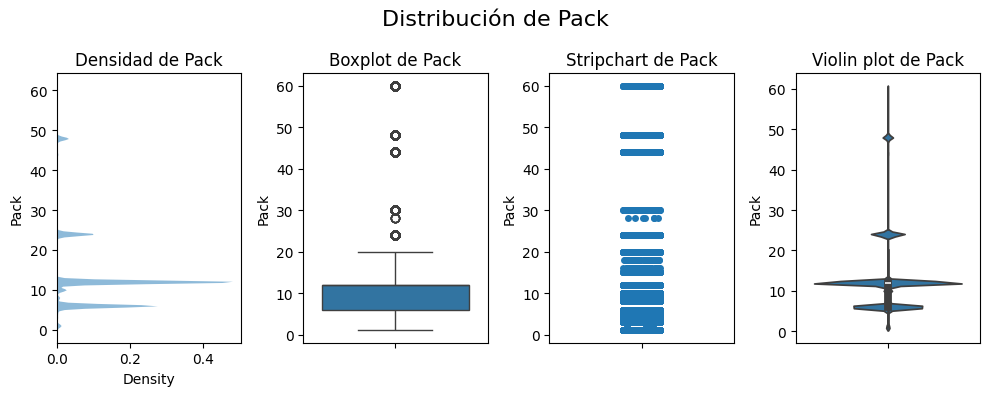

Bottle Volume (ml)


State Bottle Cost


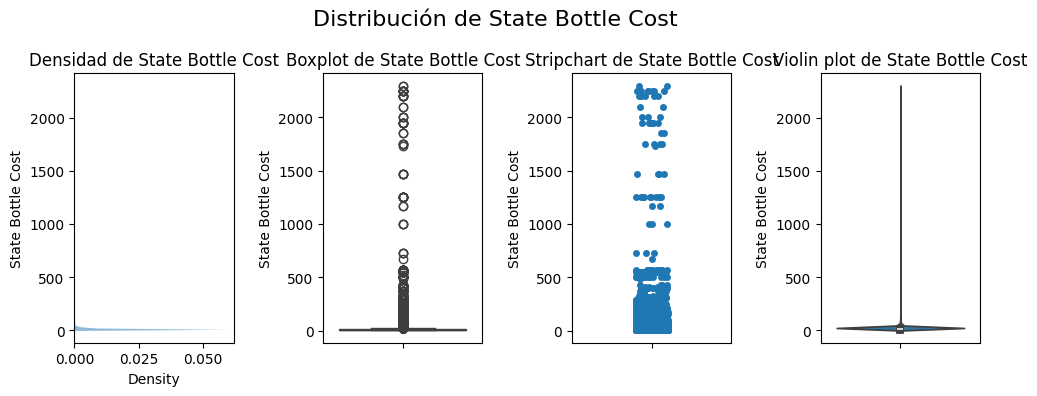

State Bottle Retail


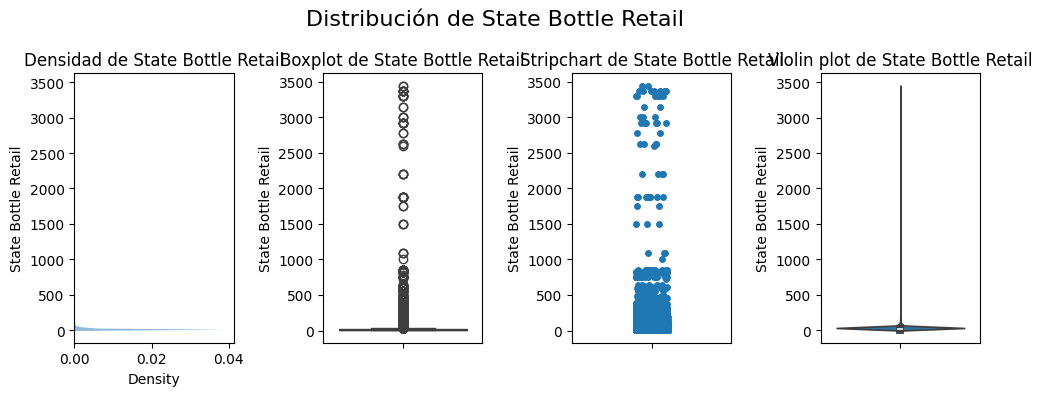

Bottles Sold


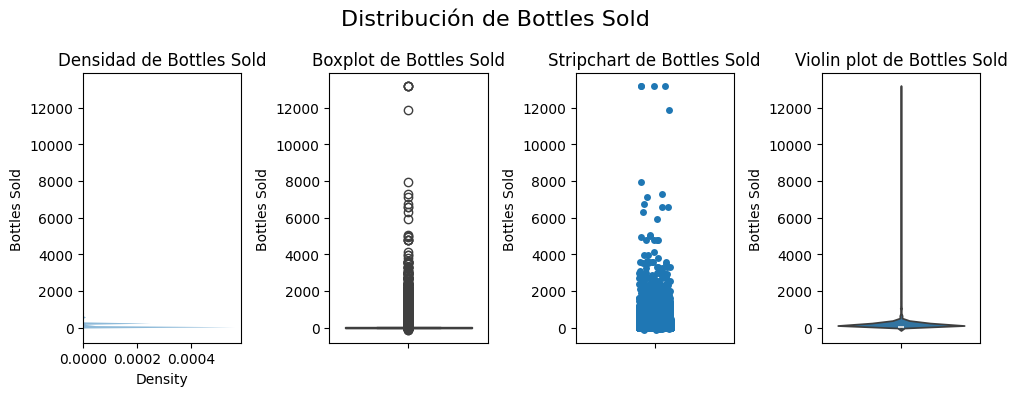

Sale (Dollars)


Volume Sold (Liters)


Volume Sold (Gallons)


In [ ]:
# Análisis de variables numéricas
# Distribuciones: densidad, boxplot, astripchart, violinplot:
print("\n--- Frecuencias columnas numericas ---")
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de densidad, boxplot, stripchart y violin plot:
num_columns = iowa_liquor.select_dtypes(include=['int64', 'float64']).columns

for i in num_columns:
    fig, axs = plt.subplots(ncols=4, figsize=(10, 4))

    # Histograma de densidad (KDE plot)
    sns.kdeplot(data=iowa_liquor, y=i, fill=True, common_norm=False, palette="crest",
                alpha=.5, linewidth=0, ax=axs[0])
    axs[0].set_title(f'Densidad de {i}')

    # Boxplot
    sns.boxplot(data=iowa_liquor, y=i, ax=axs[1])
    axs[1].set_title(f'Boxplot de {i}')

    # Stripchart
    sns.stripplot(y=i, data=iowa_liquor, ax=axs[2])
    axs[2].set_title(f'Stripchart de {i}')

    # Violin plot
    sns.violinplot(data=iowa_liquor, y=i, ax=axs[3])
    axs[3].set_title(f'Violin plot de {i}')

    fig.suptitle(f'Distribución de {i}', fontsize=16)
    fig.tight_layout()
    print(i)
    plt.show()


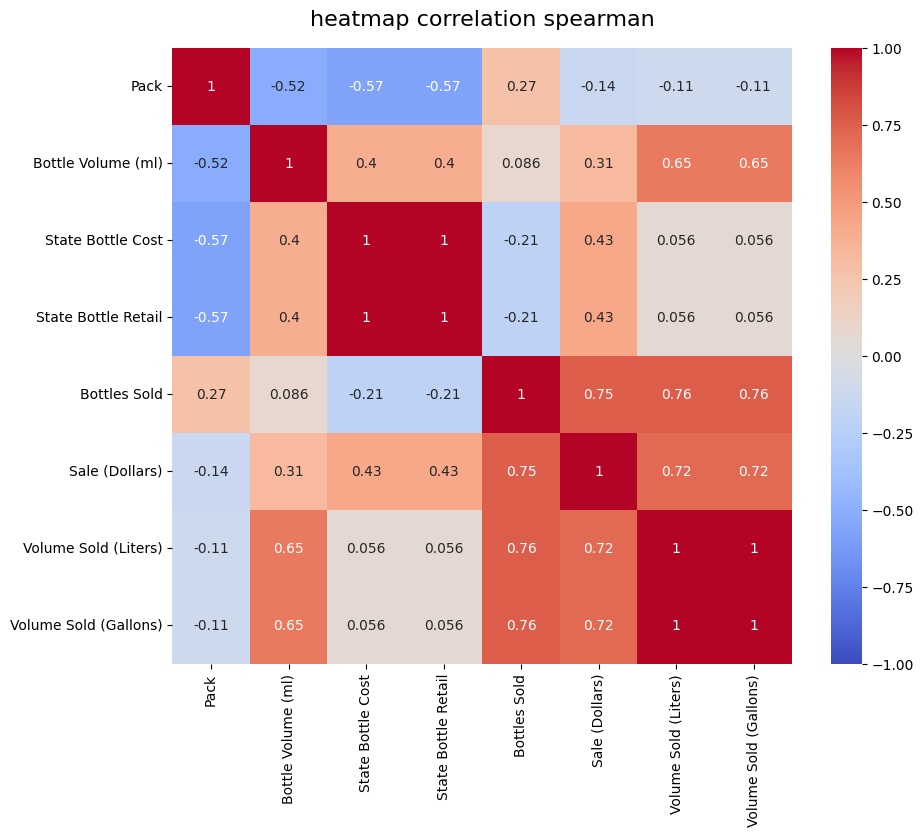

In [ ]:
# Calcula la correlación
corr_matrix = iowa_liquor[num_columns].corr(method='spearman')
# Crea el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('heatmap correlation spearman', fontdict={'fontsize':16}, pad=16)
plt.show()

### Exploración variables Categoricas

In [ ]:
# Descripción de las variables categóricas
print("\n--- Estadísticas descriptivas variables categoricas: ---")
iowa_liquor.describe(include=['object'])


--- Estadísticas descriptivas variables categoricas: ---


Store Name   County    Category Name  \
count                        3870101  3870101          3870101   
unique                           690        4               49   
top     HY-VEE #3 / BDI / DES MOINES     POLK  AMERICAN VODKAS   
freq                           73720  1921580           613998   

            Vendor Name      Item Description  
count           3870101               3870101  
unique              314                  6233  
top     DIAGEO AMERICAS  TITOS HANDMADE VODKA  
freq             612975                 90370

In [ ]:
# Identificar valores únicos por columna
cat_columns = iowa_liquor.select_dtypes(include=['object']).columns

print("\n--- Valores únicos por columna: ---")
for column in cat_columns:
    unique_values = iowa_liquor[column].unique()
    print(f"\n{column} ({len(unique_values)} valores únicos):\n{unique_values[:10]}")
    if len(unique_values) > 10:
        print("...")


--- Valores únicos por columna: ---

Store Name (690 valores únicos):
['HILLTOP GROCERY' 'HY-VEE / WINDSOR HEIGHTS'
 'HY-VEE FOOD STORE #3 / DES MOINES' 'HY-VEE FOOD STORE / MARION'
 'GD XPRESS / DAVENPORT' 'PRAIRIE MEADOWS' 'THE DEPOT NORTH LIBERTY'
 'HY-VEE FOOD STORE #2 / IOWA CITY' 'QUIK TRIP #500 / HUBBELL DM' 'SAUCE']
...

County (4 valores únicos):
['SCOTT' 'POLK' 'LINN' 'JOHNSON']

Category Name (49 valores únicos):
['CANADIAN WHISKIES' 'IMPORTED BRANDIES' 'IRISH WHISKIES'
 'AMERICAN VODKAS' 'AMERICAN SCHNAPPS' 'FLAVORED RUM'
 'IMPORTED CORDIALS & LIQUEURS' 'MIXTO TEQUILA' 'CREAM LIQUEURS'
 'WHISKEY LIQUEUR']
...

Vendor Name (314 valores únicos):
['CONSTELLATION BRANDS INC' 'MOET HENNESSY USA' 'PERNOD RICARD USA'
 'LUXCO INC' 'BACARDI USA INC' 'DIAGEO AMERICAS' 'HOOD RIVER DISTILLERS'
 'MHW LTD' 'SAZERAC COMPANY  INC' 'WILLIAM GRANT & SONS INC']
...

Item Description (6233 valores únicos):
['BLACK VELVET' 'HENNESSY VS' 'JAMESON' 'HAWKEYE VODKA'
 'ARROW PEPPERMINT SCHNAPPS' 'P


--- Frecuencias columnas categoricas ---
*************************************************
Variable = Store Name
*************************************************
                                                    Frecuencias Relativas  \
Store Name                                                                  
HY-VEE #3 / BDI / DES MOINES                                         0.02   
CENTRAL CITY 2                                                       0.02   
CENTRAL CITY LIQUOR, INC.                                            0.02   
HY-VEE #7 / CEDAR RAPIDS                                             0.01   
HY-VEE WINE AND SPIRITS / BETTENDORF                                 0.01   
BENZ DISTRIBUTING                                                    0.01   
HY-VEE FOOD STORE / CORALVILLE                                       0.01   
HY-VEE FOOD STORE #2 / STATE ANKENY                                  0.01   
HY-VEE #4 / WDM                                                   

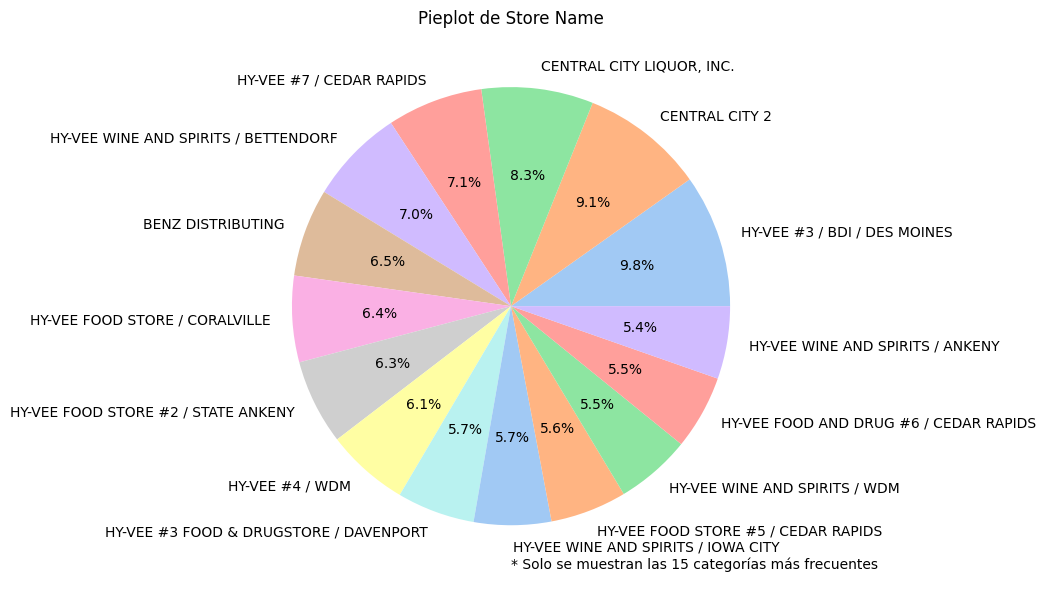

*************************************************
Variable = County
*************************************************
         Frecuencias Relativas  Frecuencias Absolutas
County                                               
POLK                      0.50                1921580
LINN                      0.22                 851490
SCOTT                     0.15                 595691
JOHNSON                   0.13                 501340


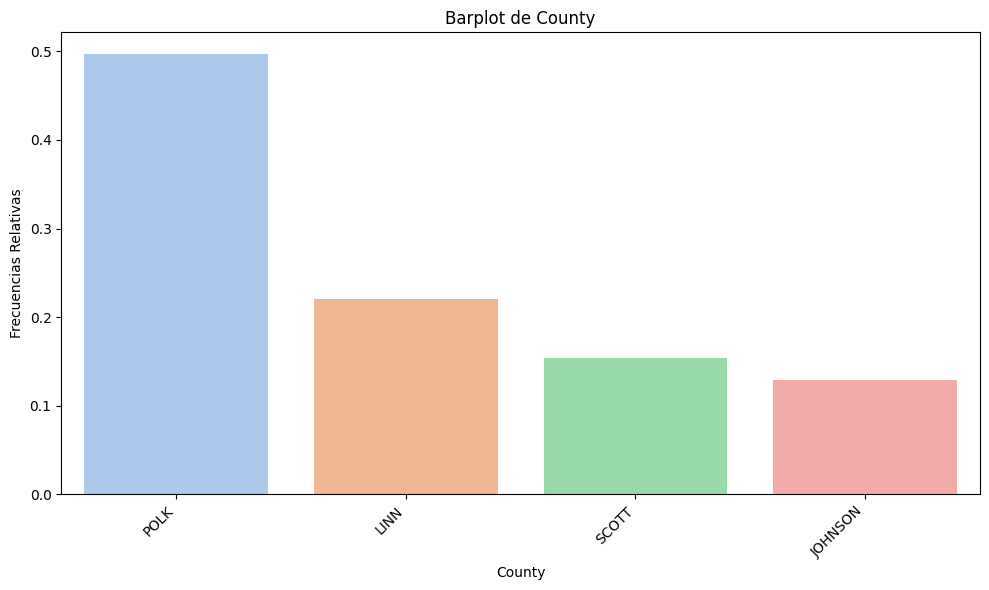

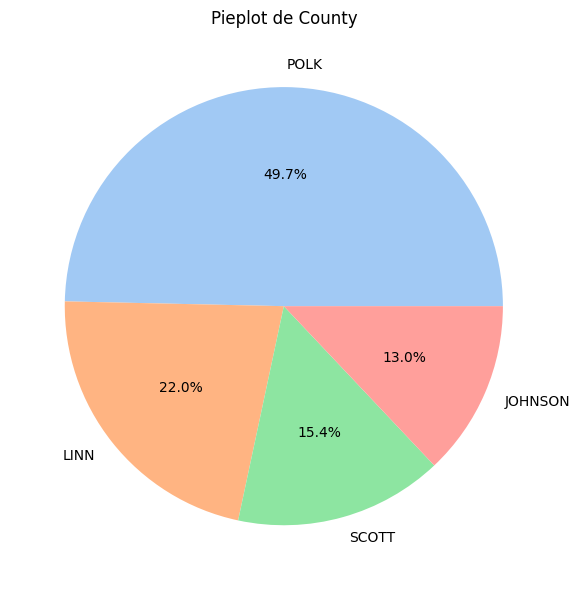

*************************************************
Variable = Category Name
*************************************************
                                      Frecuencias Relativas  \
Category Name                                                 
AMERICAN VODKAS                                        0.16   
CANADIAN WHISKIES                                      0.08   
STRAIGHT BOURBON WHISKIES                              0.07   
WHISKEY LIQUEUR                                        0.05   
AMERICAN FLAVORED VODKA                                0.05   
100% AGAVE TEQUILA                                     0.04   
SPICED RUM                                             0.04   
BLENDED WHISKIES                                       0.04   
IMPORTED VODKAS                                        0.03   
COCKTAILS/RTD                                          0.03   
IMPORTED BRANDIES                                      0.03   
AMERICAN BRANDIES                                      0

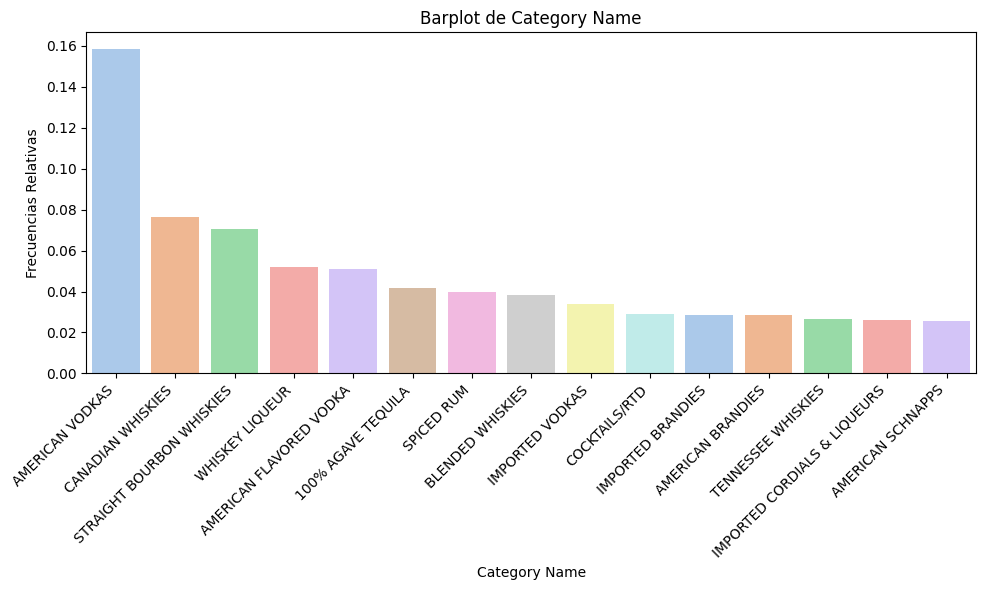

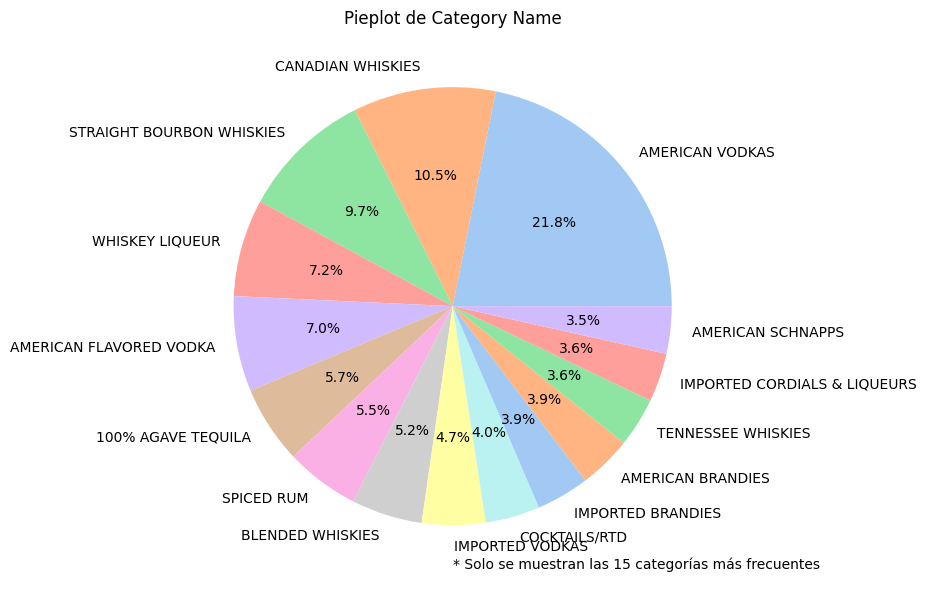

*************************************************
Variable = Vendor Name
*************************************************
                                                    Frecuencias Relativas  \
Vendor Name                                                                 
DIAGEO AMERICAS                                                      0.16   
SAZERAC COMPANY  INC                                                 0.11   
JIM BEAM BRANDS                                                      0.08   
HEAVEN HILL BRANDS                                                   0.06   
LUXCO INC                                                            0.06   
PERNOD RICARD USA                                                    0.06   
E & J GALLO WINERY                                                   0.05   
BACARDI USA INC                                                      0.05   
PROXIMO                                                              0.04   
BROWN FORMAN CORP.            

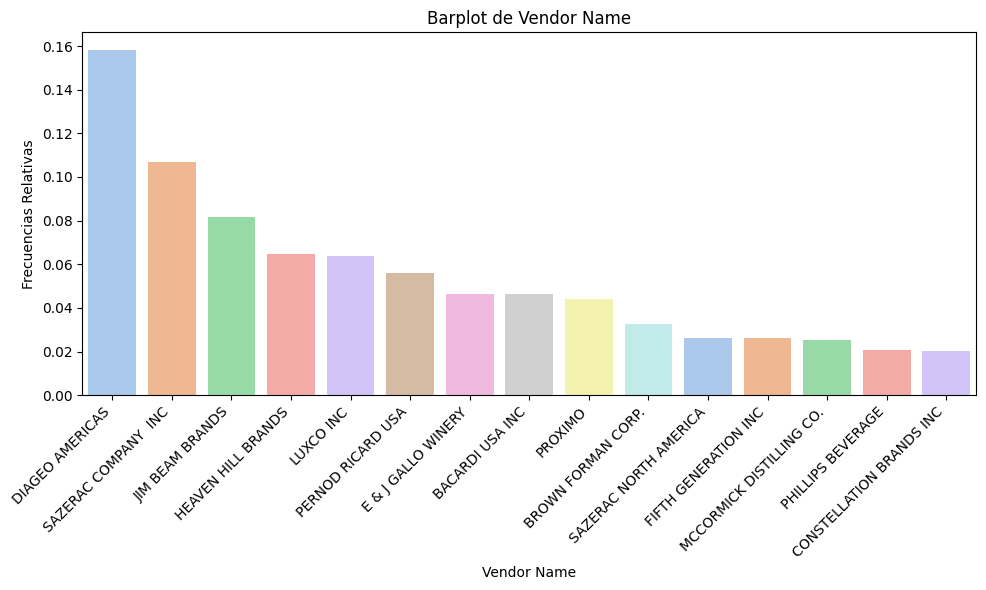

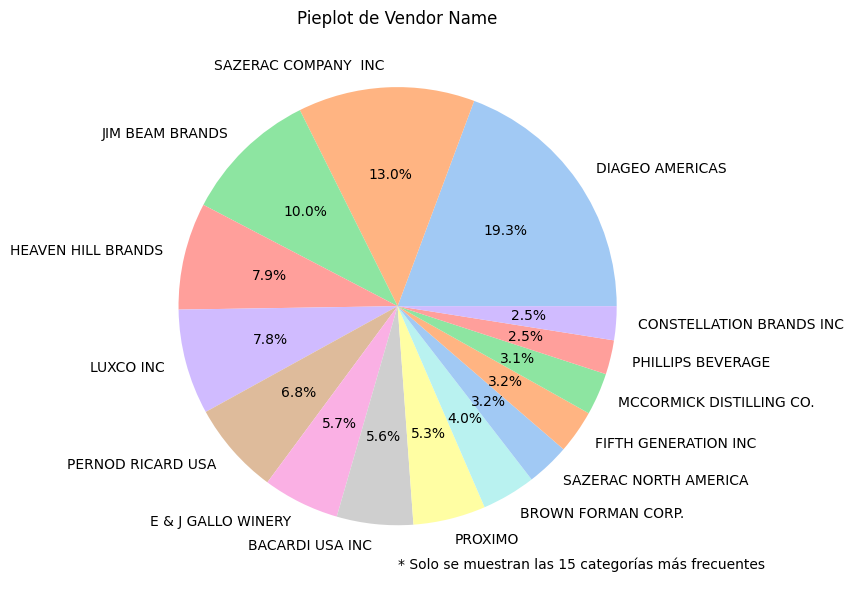

*************************************************
Variable = Item Description
*************************************************
                                                    Frecuencias Relativas  \
Item Description                                                            
TITOS HANDMADE VODKA                                                 0.02   
BLACK VELVET                                                         0.02   
FIREBALL CINNAMON WHISKEY                                            0.02   
HAWKEYE VODKA                                                        0.02   
HENNESSY VS                                                          0.01   
SMIRNOFF 80PRF                                                       0.01   
CROWN ROYAL                                                          0.01   
CAPTAIN MORGAN ORIGINAL SPICED                                       0.01   
CROWN ROYAL REGAL APPLE                                              0.01   
NEW AMSTERDAM 80PRF      

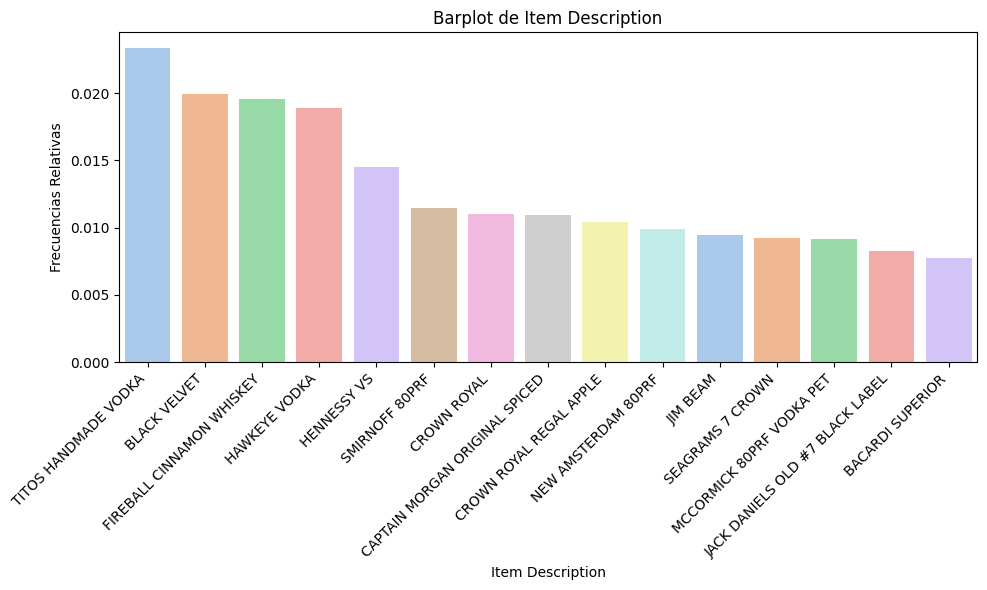

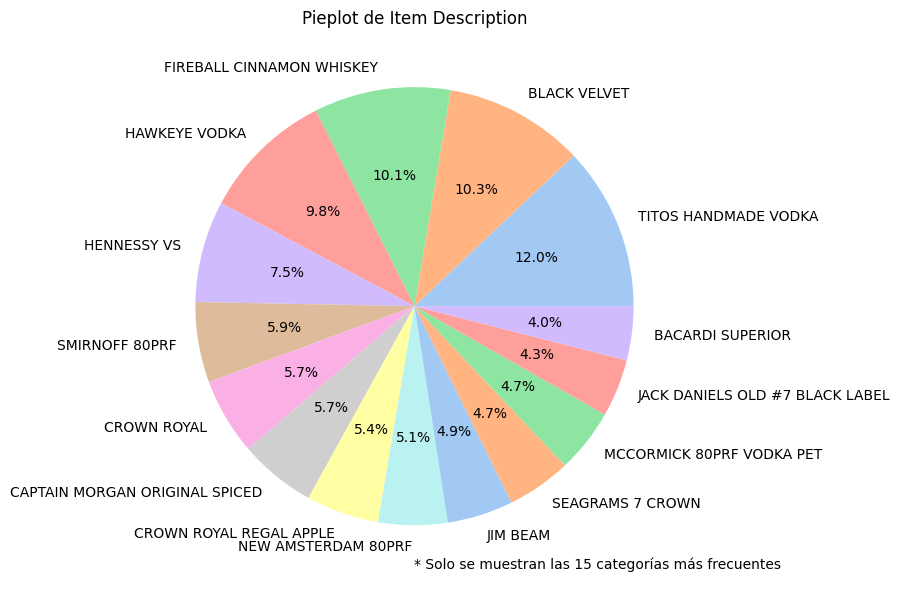

In [ ]:
# Gráficos y tablas de frecuencias de todas las variables cualitativas:

print("\n--- Frecuencias columnas categoricas ---")
for i in cat_columns:
    print("*************************************************")
    print("Variable = "+i)
    print("*************************************************")

    # 1. La tabla de frecuencias de la variable i
    pct = pd.DataFrame(iowa_liquor[i].value_counts(normalize=True))
    pct.columns = ['Frecuencias Relativas']
    pct["Frecuencias Absolutas"] = iowa_liquor[i].value_counts()
    print(pct)

    # Limitamos a las 10 categorías más frecuentes si hay más de 10
    n = 15 # Numero de categorias a mostrar
    if len(pct) > n:
        pct = pct.head(n)
        other_label = 'Otros'
    else:
        other_label = None

    # 2. Barplot de la variable i
    colors = sns.color_palette('pastel')[:n]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=pct.index, y='Frecuencias Relativas',palette=colors, data=pct)
    plt.title(f'Barplot de {i}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # 3. Pieplot de la variable i
    frec_abs = pct['Frecuencias Absolutas']
    labels = pct.index

    colors = sns.color_palette('pastel')[:len(labels)]
    plt.figure(figsize=(10, 6))
    plt.pie(frec_abs, labels=labels, colors=colors, autopct='%.1f%%')
    plt.title(f'Pieplot de {i}')
    if other_label:
        plt.text(0, -1.2, f'* Solo se muestran las {n} categorías más frecuentes', fontsize=10)
    plt.tight_layout()
    plt.show()

In [ ]:
# Análisis temporal
print("\n--- Análisis temporal ---")
iowa_liquor.set_index('Date', inplace=True)
monthly_sales = iowa_liquor.resample('M')['Sale (Dollars)'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Ventas Mensuales')
plt.ylabel('Ventas ($)')
plt.show()


--- Análisis temporal ---


   <a id='polk'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Condado POLK</p>   
    

In [ ]:
# Filtrar condado Polk

df_polk = iowa_liquor[iowa_liquor['County']=='POLK']
df_polk.drop('County', axis=1, inplace=True)
print(df_polk.shape)
df_polk.head(2)

(1921580, 12)


Store Name      Category Name  \
Date                                                               
2019-06-12           HY-VEE / WINDSOR HEIGHTS  IMPORTED BRANDIES   
2019-04-18  HY-VEE FOOD STORE #3 / DES MOINES     IRISH WHISKIES   

                  Vendor Name Item Description  Pack  Bottle Volume (ml)  \
Date                                                                       
2019-06-12  MOET HENNESSY USA      HENNESSY VS    24                 200   
2019-04-18  PERNOD RICARD USA          JAMESON     6                1750   

            State Bottle Cost  State Bottle Retail  Bottles Sold  \
Date                                                               
2019-06-12               6.24                 9.36             3   
2019-04-18              32.48                48.72             6   

            Sale (Dollars)  Volume Sold (Liters)  Volume Sold (Gallons)  
Date                                                                     
2019-06-12           28.08                  0.60                   0.15  
2019-04-18          283.32                 10.50                   2.77


--- Análisis de ventas ---


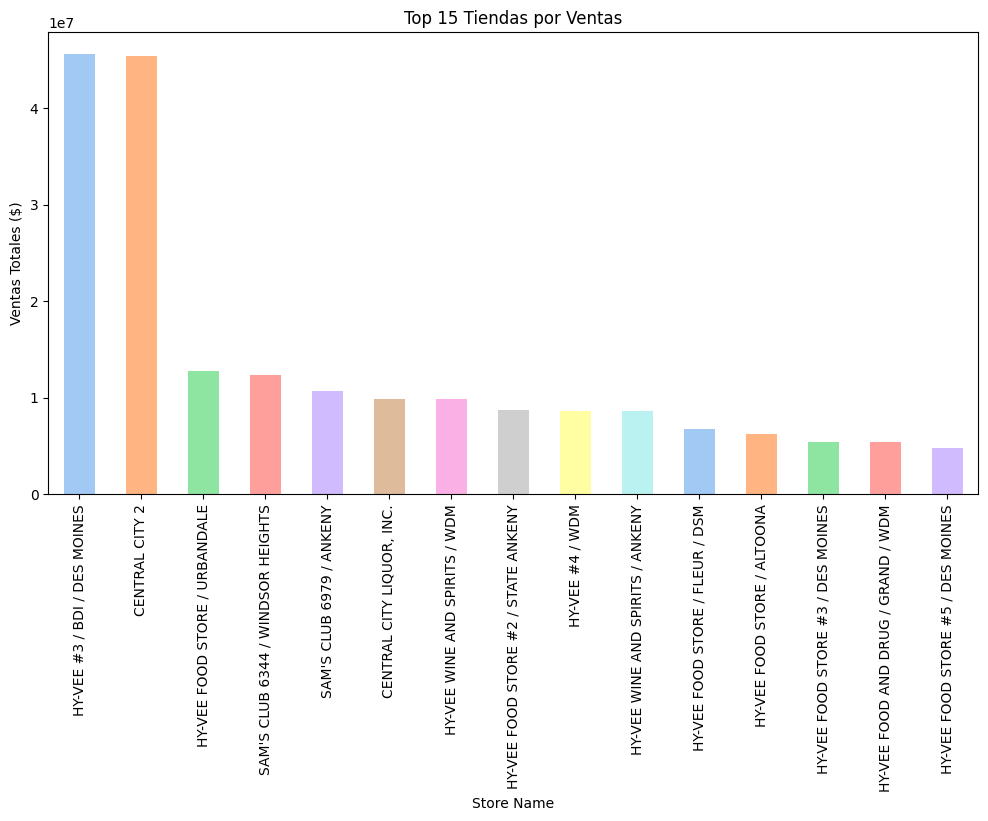

In [ ]:
# Análisis de ventas
print("\n--- Análisis de ventas ---")
plt.figure(figsize=(12, 6))
df_polk.groupby('Store Name')['Sale (Dollars)'].sum().sort_values(ascending=False).head(15).plot(kind='bar',color=colors)
plt.title('Top 15 Tiendas por Ventas')
plt.ylabel('Ventas Totales ($)')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Análisis temporal
print("\n--- Análisis temporal ---")
# df_polk.set_index('Date', inplace=True)
monthly_sales = df_polk.resample('M')['Sale (Dollars)'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Ventas Mensuales del Condado Polk')
plt.ylabel('Ventas ($)')
plt.show()


--- Análisis temporal ---



--- Relación entre variables ---


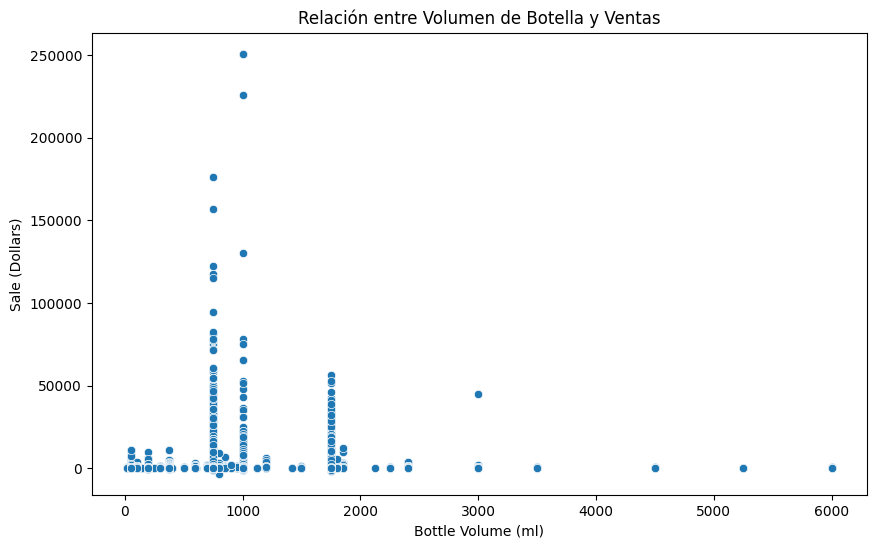

In [ ]:
# Relación entre variables Volumen de Botella y Ventas
print("\n--- Relación entre variables ---")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Bottle Volume (ml)', y='Sale (Dollars)', data=df_polk)
plt.title('Relación entre Volumen de Botella y Ventas')
plt.show()

In [ ]:
# Análisis por categoría
print("\n--- Análisis por categoría ---")
plt.figure(figsize=(12, 6))
df_polk.groupby('Category Name')['Sale (Dollars)'].sum().sort_values(ascending=False).plot(kind='bar',color=colors)
plt.title('Ventas por Categoría')
plt.ylabel('Ventas Totales ($)')
plt.xticks(rotation=90)
plt.show()


--- Análisis por categoría ---


In [ ]:
# Análisis de margen
print("\n--- Análisis de margen ---")
df_polk['Margen'] = (df_polk['State Bottle Retail'] - df_polk['State Bottle Cost']) / df_polk['State Bottle Cost']

print("\nEstadísticas de Margen:")
print(df_polk['Margen'].describe())


--- Análisis de margen ---

Estadísticas de Margen:
count   1921580.00
mean          0.50
std           0.01
min          -0.87
25%           0.50
50%           0.50
75%           0.50
max           5.69
Name: Margen, dtype: float64



--- Eficiencia de ventas ---


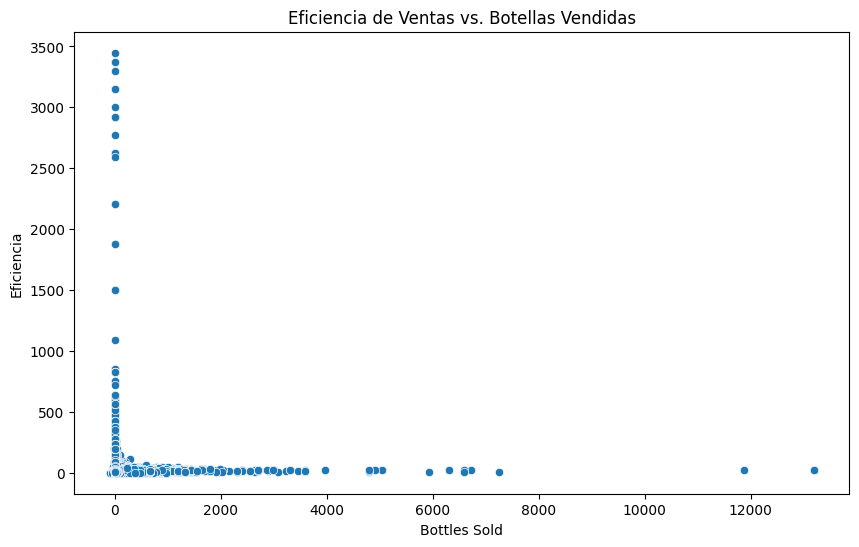

In [ ]:
# Eficiencia de ventas
print("\n--- Eficiencia de ventas ---")
df_polk['Eficiencia'] = df_polk['Sale (Dollars)'] / df_polk['Bottles Sold']
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Bottles Sold', y='Eficiencia', data=df_polk)
plt.title('Eficiencia de Ventas vs. Botellas Vendidas')
plt.show()

In [ ]:
# Análisis de outliers
print("\n--- Análisis detallado de Outliers ---")

def analyze_outliers(df, column):
    # Calculamos los límites para los outliers usando el método IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificamos los outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Imprimimos estadísticas sobre los outliers
    print(f"\nAnálisis de outliers para {column}:")
    print(f"Número de outliers: {len(outliers)}")
    print(f"Porcentaje de outliers: {len(outliers) / len(df) * 100:.2f}%")
    print(f"Rango de valores normales: {lower_bound:.2f} - {upper_bound:.2f}")

    if len(outliers) > 0:
        print("\nEstadísticas de los outliers:")
        print(outliers[column].describe())


# Analizamos outliers para columnas numéricas relevantes
numeric_columns = ['Sale (Dollars)', 'Bottles Sold', 'Volume Sold (Liters)',
                   'State Bottle Cost', 'State Bottle Retail']

for col in numeric_columns:
    analyze_outliers(df_polk, col)



--- Análisis detallado de Outliers ---

Análisis de outliers para Sale (Dollars):
Número de outliers: 134257
Porcentaje de outliers: 6.99%
Rango de valores normales: -157.50 - 382.50

Estadísticas de los outliers:
count   134257.00
mean      1312.74
std       2884.55
min      -3375.00
25%        486.00
50%        652.32
75%       1170.00
max     250932.00
Name: Sale (Dollars), dtype: float64

Análisis de outliers para Bottles Sold:
Número de outliers: 131749
Porcentaje de outliers: 6.86%
Rango de valores normales: -10.50 - 25.50

Estadísticas de los outliers:
count   131749.00
mean        94.12
std        157.50
min        -96.00
25%         48.00
50%         48.00
75%         96.00
max      13200.00
Name: Bottles Sold, dtype: float64

Análisis de outliers para Volume Sold (Liters):
Número de outliers: 143302
Porcentaje de outliers: 7.46%
Rango de valores normales: -9.75 - 20.25

Estadísticas de los outliers:
count   143302.00
mean        69.88
std        159.46
min        -63.00
25% 

In [ ]:
# Impacto de los outliers en las estadísticas
print("\n--- Impacto de los outliers en las estadísticas ---")

def stats_with_without_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_without_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    print(f"\nEstadísticas para {column}:")
    print("Con outliers:")
    print(df[column].describe())
    print("\nSin outliers:")
    print(df_without_outliers[column].describe())

for col in numeric_columns:
    stats_with_without_outliers(df_polk, col)



--- Impacto de los outliers en las estadísticas ---

Estadísticas para Sale (Dollars):
Con outliers:
count   1921580.00
mean        193.45
std         825.94
min       -3375.00
25%          45.00
50%          94.20
75%         180.00
max      250932.00
Name: Sale (Dollars), dtype: float64

Sin outliers:
count   1787323.00
mean        109.37
std          85.04
min        -157.50
25%          41.76
50%          86.76
75%         157.32
max         382.50
Name: Sale (Dollars), dtype: float64

Estadísticas para Bottles Sold:
Con outliers:
count   1921580.00
mean         13.92
std          47.00
min         -96.00
25%           3.00
50%           6.00
75%          12.00
max       13200.00
Name: Bottles Sold, dtype: float64

Sin outliers:
count   1789831.00
mean          8.01
std           6.13
min         -10.00
25%           3.00
50%           6.00
75%          12.00
max          25.00
Name: Bottles Sold, dtype: float64

Estadísticas para Volume Sold (Liters):
Con outliers:
count   192158

In [ ]:
# Patrones de venta por día de la semana
print("\n--- Patrones de venta por día de la semana ---")
df_polk['Dia_Semana'] = df_polk.index.dayofweek
ventas_por_dia = df_polk.groupby('Dia_Semana')['Sale (Dollars)'].mean()
plt.figure(figsize=(10, 6))
ventas_por_dia.plot(kind='bar', color=colors)
plt.title('Ventas Promedio por Día de la Semana')
plt.xlabel('Día de la Semana (0 = Lunes, 6 = Domingo)')
plt.ylabel('Ventas Promedio ($)')
plt.xticks(rotation=0)
plt.show()


--- Patrones de venta por día de la semana ---



--- Análisis de la relación precio-volumen ---


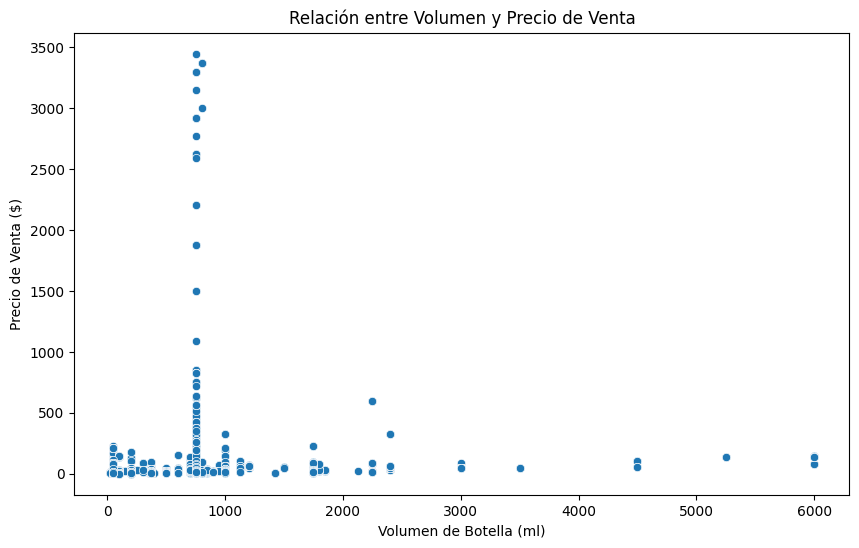

In [ ]:
# Análisis de la relación precio-volumen
print("\n--- Análisis de la relación precio-volumen ---")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Bottle Volume (ml)', y='State Bottle Retail', data=df_polk)
plt.title('Relación entre Volumen y Precio de Venta')
plt.xlabel('Volumen de Botella (ml)')
plt.ylabel('Precio de Venta ($)')
plt.show()

   <a id='polk'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Condado SCOTT</p>   
    

In [ ]:
# Filtrar condado Polk

df_scott = iowa_liquor[iowa_liquor['County']=='SCOTT']
df_scott.drop('County', axis=1, inplace=True)
print(df_scott.shape)
df_scott.head(2)

(595691, 12)


Store Name      Category Name  \
Date                                                   
2019-06-10        HILLTOP GROCERY  CANADIAN WHISKIES   
2019-11-19  GD XPRESS / DAVENPORT  AMERICAN SCHNAPPS   

                         Vendor Name           Item Description  Pack  \
Date                                                                    
2019-06-10  CONSTELLATION BRANDS INC               BLACK VELVET    48   
2019-11-19                 LUXCO INC  ARROW PEPPERMINT SCHNAPPS     6   

            Bottle Volume (ml)  State Bottle Cost  State Bottle Retail  \
Date                                                                     
2019-06-10                 200               1.56                 2.34   
2019-11-19                1750               7.00                10.50   

            Bottles Sold  Sale (Dollars)  Volume Sold (Liters)  \
Date                                                             
2019-06-10            48          112.32                  9.60   
2019-11-19             6           63.00                 10.50   

            Volume Sold (Gallons)  
Date                               
2019-06-10                   2.53  
2019-11-19                   2.77

In [ ]:
# Análisis de ventas
print("\n--- Análisis de ventas ---")
plt.figure(figsize=(12, 6))
df_scott.groupby('Store Name')['Sale (Dollars)'].sum().sort_values(ascending=False).head(15).plot(kind='bar',color=colors)
plt.title('Top 15 Tiendas por Ventas')
plt.ylabel('Ventas Totales ($)')
plt.xticks(rotation=90)
plt.show()


--- Análisis de ventas ---



--- Análisis temporal ---


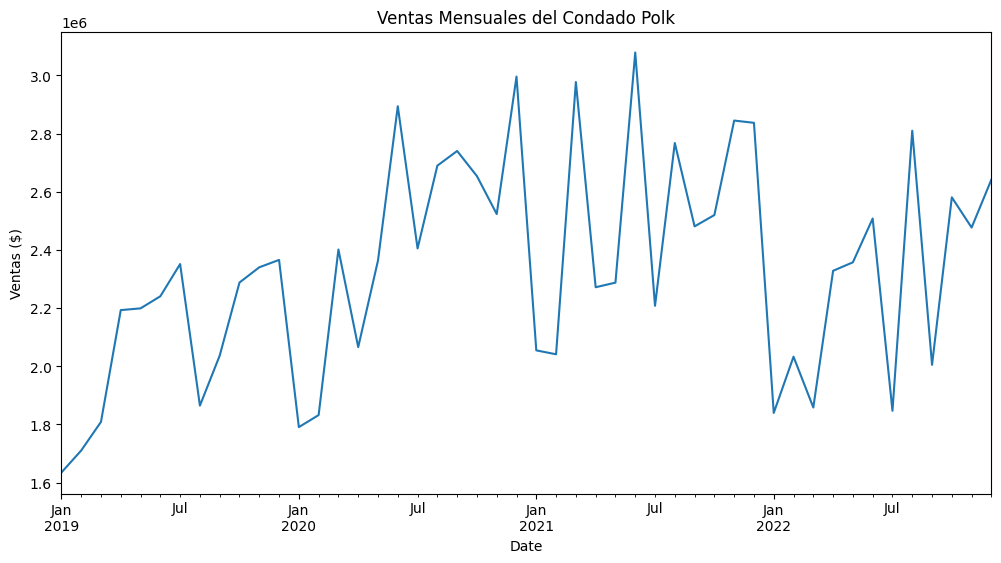

In [ ]:
# Análisis temporal
print("\n--- Análisis temporal ---")
# df_scott.set_index('Date', inplace=True)
monthly_sales = df_scott.resample('M')['Sale (Dollars)'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Ventas Mensuales del Condado Polk')
plt.ylabel('Ventas ($)')
plt.show()

In [ ]:
# Relación entre variables Volumen de Botella y Ventas
print("\n--- Relación entre variables ---")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Bottle Volume (ml)', y='Sale (Dollars)', data=df_scott)
plt.title('Relación entre Volumen de Botella y Ventas')
plt.show()



--- Relación entre variables ---



--- Análisis por categoría ---


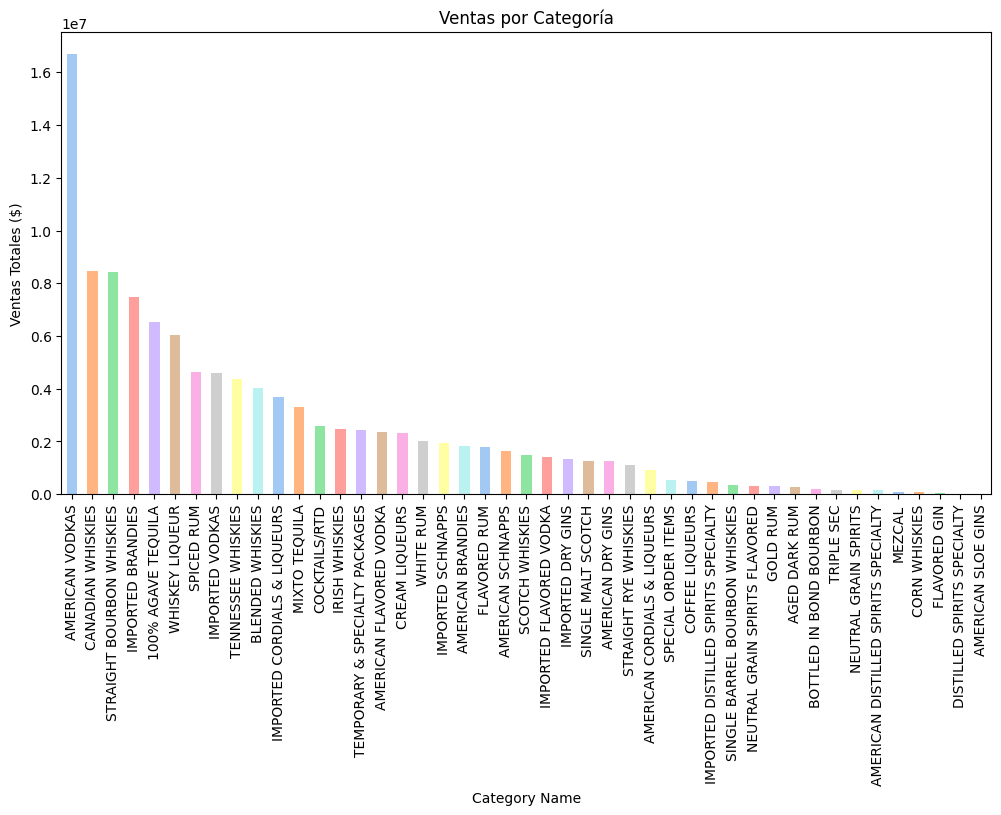

In [ ]:
# Análisis por categoría
print("\n--- Análisis por categoría ---")
plt.figure(figsize=(12, 6))
df_scott.groupby('Category Name')['Sale (Dollars)'].sum().sort_values(ascending=False).plot(kind='bar',color=colors)
plt.title('Ventas por Categoría')
plt.ylabel('Ventas Totales ($)')
plt.xticks(rotation=90)
plt.show()


--- Análisis de margen ---

Estadísticas de Margen:
count   595691.00
mean         0.50
std          0.01
min          0.02
25%          0.50
50%          0.50
75%          0.50
max          1.85
Name: Margen, dtype: float64

--- Eficiencia de ventas ---


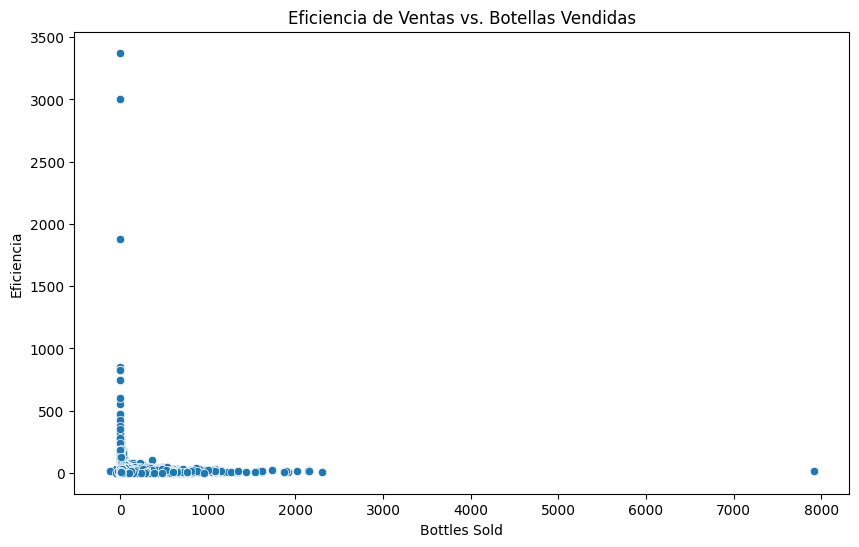

In [ ]:
# Análisis de margen
print("\n--- Análisis de margen ---")
df_scott['Margen'] = (df_scott['State Bottle Retail'] - df_scott['State Bottle Cost']) / df_scott['State Bottle Cost']

print("\nEstadísticas de Margen:")
print(df_scott['Margen'].describe())

# Eficiencia de ventas
print("\n--- Eficiencia de ventas ---")
df_scott['Eficiencia'] = df_scott['Sale (Dollars)'] / df_scott['Bottles Sold']
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Bottles Sold', y='Eficiencia', data=df_scott)
plt.title('Eficiencia de Ventas vs. Botellas Vendidas')
plt.show()

In [ ]:
# Análisis de outliers
print("\n--- Análisis detallado de Outliers ---")

def analyze_outliers(df, column):
    # Calculamos los límites para los outliers usando el método IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificamos los outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Imprimimos estadísticas sobre los outliers
    print(f"\nAnálisis de outliers para {column}:")
    print(f"Número de outliers: {len(outliers)}")
    print(f"Porcentaje de outliers: {len(outliers) / len(df) * 100:.2f}%")
    print(f"Rango de valores normales: {lower_bound:.2f} - {upper_bound:.2f}")

    if len(outliers) > 0:
        print("\nEstadísticas de los outliers:")
        print(outliers[column].describe())


# Analizamos outliers para columnas numéricas relevantes
numeric_columns = ['Sale (Dollars)', 'Bottles Sold', 'Volume Sold (Liters)',
                   'State Bottle Cost', 'State Bottle Retail']

for col in numeric_columns:
    analyze_outliers(df_scott, col)


--- Análisis detallado de Outliers ---

Análisis de outliers para Sale (Dollars):
Número de outliers: 45438
Porcentaje de outliers: 7.63%
Rango de valores normales: -146.33 - 375.80

Estadísticas de los outliers:
count    45438.00
mean      1134.50
std       1756.53
min      -1656.00
25%        459.96
50%        620.64
75%       1102.50
max     150559.20
Name: Sale (Dollars), dtype: float64

Análisis de outliers para Bottles Sold:
Número de outliers: 53705
Porcentaje de outliers: 9.02%
Rango de valores normales: -10.50 - 25.50

Estadísticas de los outliers:
count   53705.00
mean       79.46
std        96.84
min      -120.00
25%        48.00
50%        48.00
75%        84.00
max      7920.00
Name: Bottles Sold, dtype: float64

Análisis de outliers para Volume Sold (Liters):
Número de outliers: 38339
Porcentaje de outliers: 6.44%
Rango de valores normales: -10.75 - 23.25

Estadísticas de los outliers:
count   38339.00
mean       77.32
std       156.50
min       -52.50
25%        27.00
5

In [ ]:
# Impacto de los outliers en las estadísticas
print("\n--- Impacto de los outliers en las estadísticas ---")

def stats_with_without_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_without_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    print(f"\nEstadísticas para {column}:")
    print("Con outliers:")
    print(df[column].describe())
    print("\nSin outliers:")
    print(df_without_outliers[column].describe())

for col in numeric_columns:
    stats_with_without_outliers(df_scott, col)



--- Impacto de los outliers en las estadísticas ---

Estadísticas para Sale (Dollars):
Con outliers:
count   595691.00
mean       188.08
std        561.92
min      -1656.00
25%         49.47
50%         94.47
75%        180.00
max     150559.20
Name: Sale (Dollars), dtype: float64

Sin outliers:
count   550253.00
mean       109.93
std         83.56
min       -141.12
25%         45.00
50%         87.12
75%        156.60
max        375.60
Name: Sale (Dollars), dtype: float64

Estadísticas para Bottles Sold:
Con outliers:
count   595691.00
mean        14.98
std         36.03
min       -120.00
25%          3.00
50%          6.00
75%         12.00
max       7920.00
Name: Bottles Sold, dtype: float64

Sin outliers:
count   541986.00
mean         8.59
std          6.70
min         -8.00
25%          3.00
50%          6.00
75%         12.00
max         25.00
Name: Bottles Sold, dtype: float64

Estadísticas para Volume Sold (Liters):
Con outliers:
count   595691.00
mean        10.78
std       

In [ ]:
# Patrones de venta por día de la semana
print("\n--- Patrones de venta por día de la semana ---")
df_scott['Dia_Semana'] = df_scott.index.dayofweek
ventas_por_dia = df_scott.groupby('Dia_Semana')['Sale (Dollars)'].mean()
plt.figure(figsize=(10, 6))
ventas_por_dia.plot(kind='bar', color=colors)
plt.title('Ventas Promedio por Día de la Semana')
plt.xlabel('Día de la Semana (0 = Lunes, 6 = Domingo)')
plt.ylabel('Ventas Promedio ($)')
plt.xticks(rotation=0)
plt.show()


--- Patrones de venta por día de la semana ---



--- Análisis de la relación precio-volumen ---


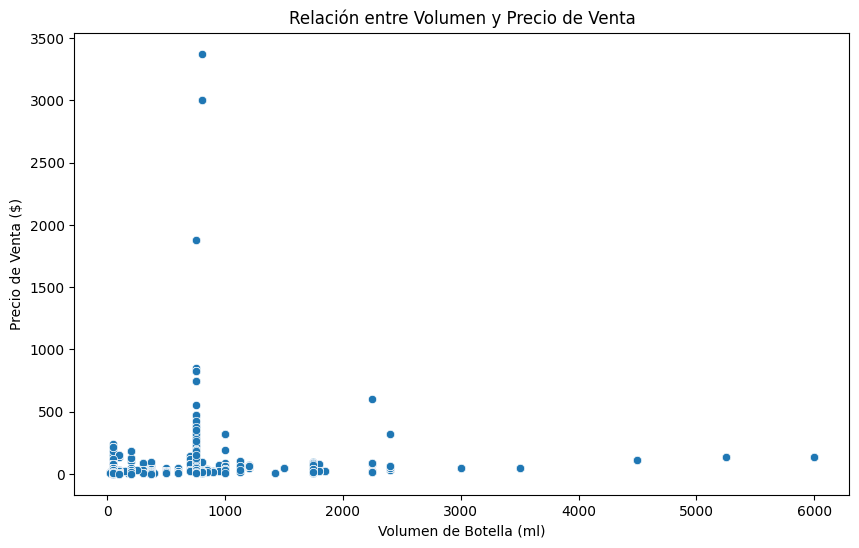

In [ ]:
# Análisis de la relación precio-volumen
print("\n--- Análisis de la relación precio-volumen ---")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Bottle Volume (ml)', y='State Bottle Retail', data=df_scott)
plt.title('Relación entre Volumen y Precio de Venta')
plt.xlabel('Volumen de Botella (ml)')
plt.ylabel('Precio de Venta ($)')
plt.show()

   <a id='polk'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Condado LINN</p>  

In [ ]:
# Filtrar condado Polk

df_linn = iowa_liquor[iowa_liquor['County']=='LINN']
df_linn.drop('County', axis=1, inplace=True)
print(df_linn.shape)
df_linn.head(2)

(851490, 12)


Store Name      Category Name      Vendor Name  \
Date                                                                         
2019-08-09  HY-VEE FOOD STORE / MARION    AMERICAN VODKAS        LUXCO INC   
2019-03-11  HY-VEE FOOD STORE / MARION  CANADIAN WHISKIES  DIAGEO AMERICAS   

             Item Description  Pack  Bottle Volume (ml)  State Bottle Cost  \
Date                                                                         
2019-08-09      HAWKEYE VODKA     6                1750               7.17   
2019-03-11  CROWN ROYAL BLACK    12                 750              17.00   

            State Bottle Retail  Bottles Sold  Sale (Dollars)  \
Date                                                            
2019-08-09                10.76            12          129.12   
2019-03-11                25.50             6          153.00   

            Volume Sold (Liters)  Volume Sold (Gallons)  
Date                                                     
2019-08-09                 21.00                   5.54  
2019-03-11                  4.50                   1.18


--- Análisis de ventas ---


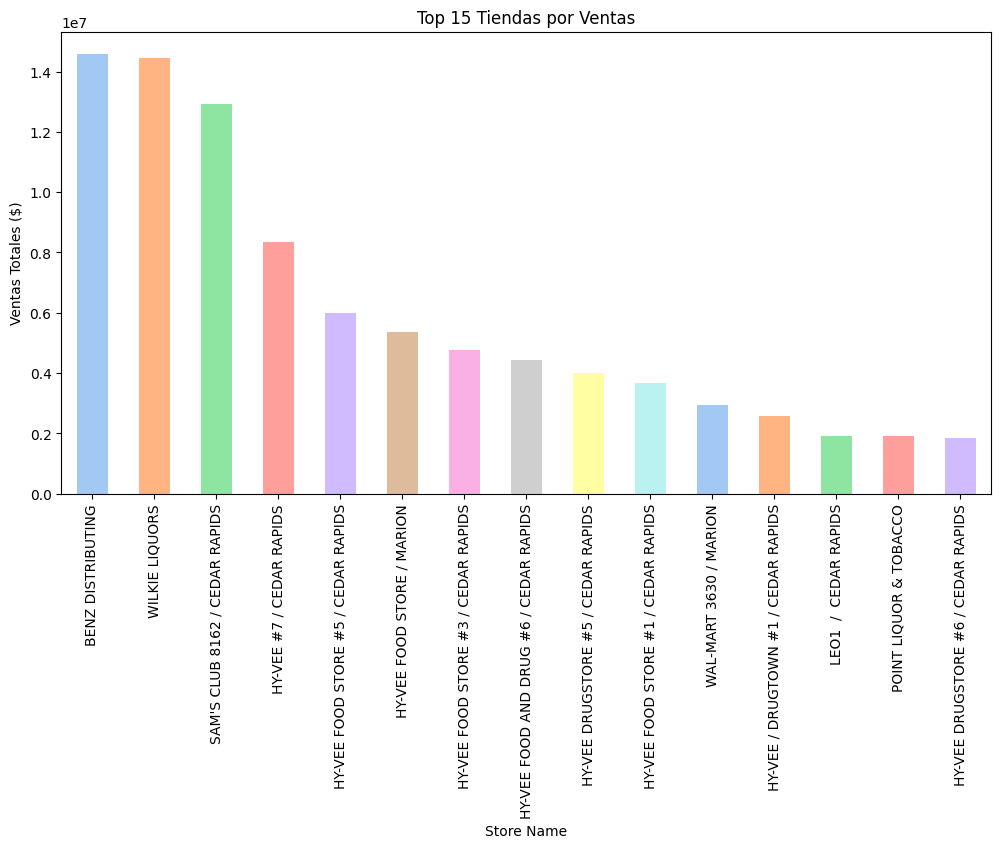

In [ ]:
# Análisis de ventas
print("\n--- Análisis de ventas ---")
plt.figure(figsize=(12, 6))
df_linn.groupby('Store Name')['Sale (Dollars)'].sum().sort_values(ascending=False).head(15).plot(kind='bar',color=colors)
plt.title('Top 15 Tiendas por Ventas')
plt.ylabel('Ventas Totales ($)')
plt.xticks(rotation=90)
plt.show()


--- Análisis temporal ---


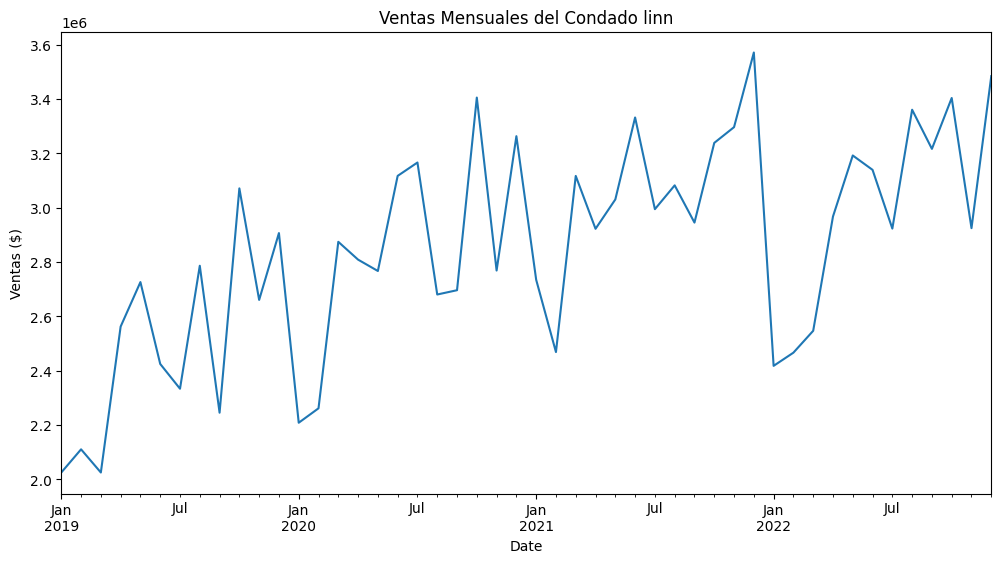

In [ ]:
# Análisis temporal
print("\n--- Análisis temporal ---")
# df_linn.set_index('Date', inplace=True)
monthly_sales = df_linn.resample('M')['Sale (Dollars)'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Ventas Mensuales del Condado linn')
plt.ylabel('Ventas ($)')
plt.show()


--- Relación entre variables ---


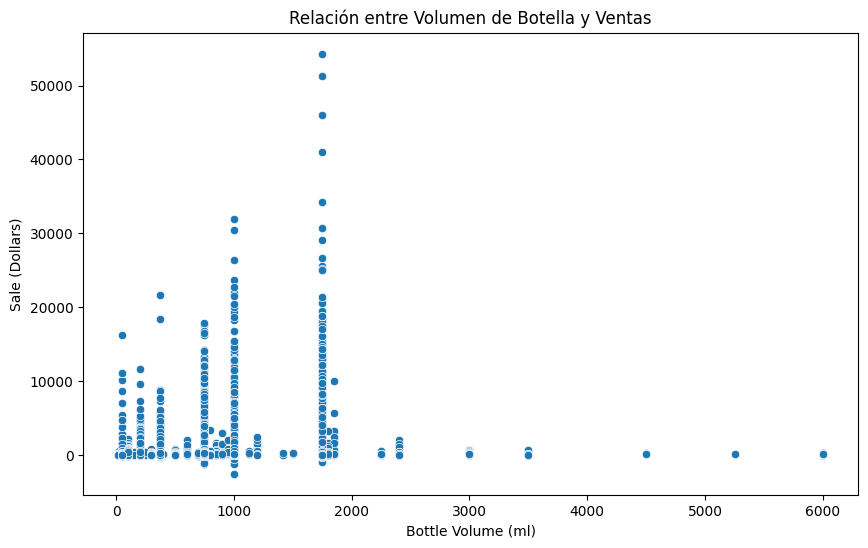

In [ ]:
# Relación entre variables Volumen de Botella y Ventas
print("\n--- Relación entre variables ---")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Bottle Volume (ml)', y='Sale (Dollars)', data=df_linn)
plt.title('Relación entre Volumen de Botella y Ventas')
plt.show()

In [ ]:
# Análisis por categoría
print("\n--- Análisis por categoría ---")
plt.figure(figsize=(12, 6))
df_linn.groupby('Category Name')['Sale (Dollars)'].sum().sort_values(ascending=False).plot(kind='bar',color=colors)
plt.title('Ventas por Categoría')
plt.ylabel('Ventas Totales ($)')
plt.xticks(rotation=90)
plt.show()


--- Análisis por categoría ---


In [ ]:
# Análisis de margen
print("\n--- Análisis de margen ---")
df_linn['Margen'] = (df_linn['State Bottle Retail'] - df_linn['State Bottle Cost']) / df_linn['State Bottle Cost']

print("\nEstadísticas de Margen:")
print(df_linn['Margen'].describe())


--- Análisis de margen ---

Estadísticas de Margen:
count   851490.00
mean         0.50
std          0.01
min          0.08
25%          0.50
50%          0.50
75%          0.50
max          3.43
Name: Margen, dtype: float64


In [ ]:
# Eficiencia de ventas
print("\n--- Eficiencia de ventas ---")
df_linn['Eficiencia'] = df_linn['Sale (Dollars)'] / df_linn['Bottles Sold']
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Bottles Sold', y='Eficiencia', data=df_linn)
plt.title('Eficiencia de Ventas vs. Botellas Vendidas')
plt.show()


--- Eficiencia de ventas ---


In [ ]:

# Análisis de outliers
print("\n--- Análisis detallado de Outliers ---")

def analyze_outliers(df, column):
    # Calculamos los límites para los outliers usando el método IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificamos los outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Imprimimos estadísticas sobre los outliers
    print(f"\nAnálisis de outliers para {column}:")
    print(f"Número de outliers: {len(outliers)}")
    print(f"Porcentaje de outliers: {len(outliers) / len(df) * 100:.2f}%")
    print(f"Rango de valores normales: {lower_bound:.2f} - {upper_bound:.2f}")

    if len(outliers) > 0:
        print("\nEstadísticas de los outliers:")
        print(outliers[column].describe())


# Analizamos outliers para columnas numéricas relevantes
numeric_columns = ['Sale (Dollars)', 'Bottles Sold', 'Volume Sold (Liters)',
                   'State Bottle Cost', 'State Bottle Retail']

for col in numeric_columns:
    analyze_outliers(df_linn, col)



--- Análisis detallado de Outliers ---

Análisis de outliers para Sale (Dollars):
Número de outliers: 54108
Porcentaje de outliers: 6.35%
Rango de valores normales: -141.90 - 344.34

Estadísticas de los outliers:
count   54108.00
mean     1069.50
std      1520.45
min     -2519.16
25%       423.36
50%       588.24
75%      1020.60
max     54312.96
Name: Sale (Dollars), dtype: float64

Análisis de outliers para Bottles Sold:
Número de outliers: 51542
Porcentaje de outliers: 6.05%
Rango de valores normales: -10.50 - 25.50

Estadísticas de los outliers:
count   51542.00
mean       87.88
std       103.08
min      -156.00
25%        48.00
50%        48.00
75%        96.00
max      4992.00
Name: Bottles Sold, dtype: float64

Análisis de outliers para Volume Sold (Liters):
Número de outliers: 33912
Porcentaje de outliers: 3.98%
Rango de valores normales: -12.00 - 24.00

Estadísticas de los outliers:
count   33912.00
mean       95.61
std       155.73
min      -156.00
25%        36.00
50%      

In [ ]:
# Impacto de los outliers en las estadísticas
print("\n--- Impacto de los outliers en las estadísticas ---")

def stats_with_without_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_without_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    print(f"\nEstadísticas para {column}:")
    print("Con outliers:")
    print(df[column].describe())
    print("\nSin outliers:")
    print(df_without_outliers[column].describe())

for col in numeric_columns:
    stats_with_without_outliers(df_linn, col)



--- Impacto de los outliers en las estadísticas ---

Estadísticas para Sale (Dollars):
Con outliers:
count   851490.00
mean       160.50
std        456.79
min      -2519.16
25%         40.44
50%         81.60
75%        162.00
max      54312.96
Name: Sale (Dollars), dtype: float64

Sin outliers:
count   797382.00
mean        98.82
std         77.92
min       -138.00
25%         37.17
50%         76.44
75%        140.16
max        344.34
Name: Sale (Dollars), dtype: float64

Estadísticas para Bottles Sold:
Con outliers:
count   851490.00
mean        12.57
std         32.31
min       -156.00
25%          3.00
50%          6.00
75%         12.00
max       4992.00
Name: Bottles Sold, dtype: float64

Sin outliers:
count   799948.00
mean         7.71
std          6.15
min         -8.00
25%          3.00
50%          6.00
75%         12.00
max         25.00
Name: Bottles Sold, dtype: float64

Estadísticas para Volume Sold (Liters):
Con outliers:
count   851490.00
mean         9.63
std       

In [ ]:
# Patrones de venta por día de la semana
print("\n--- Patrones de venta por día de la semana ---")
df_linn['Dia_Semana'] = df_linn.index.dayofweek
ventas_por_dia = df_linn.groupby('Dia_Semana')['Sale (Dollars)'].mean()
plt.figure(figsize=(10, 6))
ventas_por_dia.plot(kind='bar', color=colors)
plt.title('Ventas Promedio por Día de la Semana')
plt.xlabel('Día de la Semana (0 = Lunes, 6 = Domingo)')
plt.ylabel('Ventas Promedio ($)')
plt.xticks(rotation=0)
plt.show()


--- Patrones de venta por día de la semana ---



--- Análisis de la relación precio-volumen ---


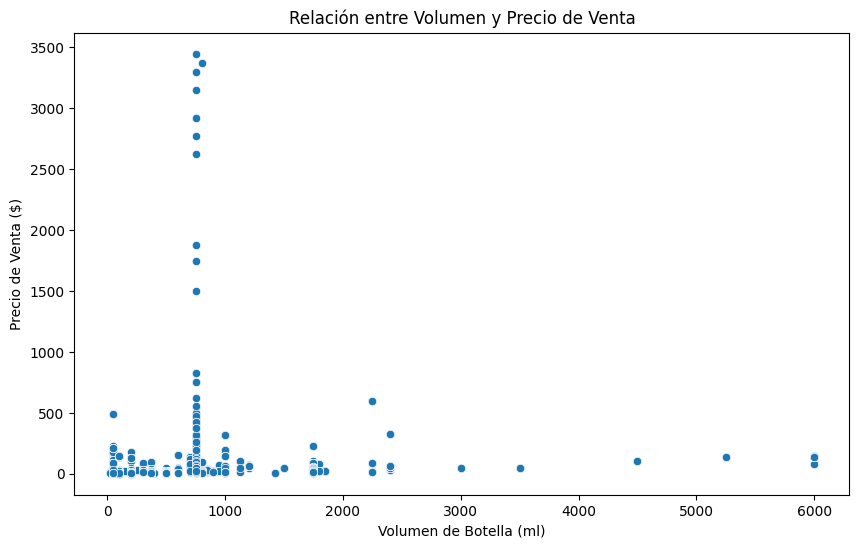

In [ ]:
# Análisis de la relación precio-volumen
print("\n--- Análisis de la relación precio-volumen ---")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Bottle Volume (ml)', y='State Bottle Retail', data=df_linn)
plt.title('Relación entre Volumen y Precio de Venta')
plt.xlabel('Volumen de Botella (ml)')
plt.ylabel('Precio de Venta ($)')
plt.show()

   <a id='polk'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Condado JOHNSON</p>  

In [ ]:
# Filtrar condado Polk

df_js = iowa_liquor[iowa_liquor['County']=='SCOTT']
df_js.drop('County', axis=1, inplace=True)
print(df_js.shape)
df_js.head(2)

(595691, 12)


Store Name      Category Name  \
Date                                                   
2019-06-10        HILLTOP GROCERY  CANADIAN WHISKIES   
2019-11-19  GD XPRESS / DAVENPORT  AMERICAN SCHNAPPS   

                         Vendor Name           Item Description  Pack  \
Date                                                                    
2019-06-10  CONSTELLATION BRANDS INC               BLACK VELVET    48   
2019-11-19                 LUXCO INC  ARROW PEPPERMINT SCHNAPPS     6   

            Bottle Volume (ml)  State Bottle Cost  State Bottle Retail  \
Date                                                                     
2019-06-10                 200               1.56                 2.34   
2019-11-19                1750               7.00                10.50   

            Bottles Sold  Sale (Dollars)  Volume Sold (Liters)  \
Date                                                             
2019-06-10            48          112.32                  9.60   
2019-11-19             6           63.00                 10.50   

            Volume Sold (Gallons)  
Date                               
2019-06-10                   2.53  
2019-11-19                   2.77


--- Análisis de ventas ---


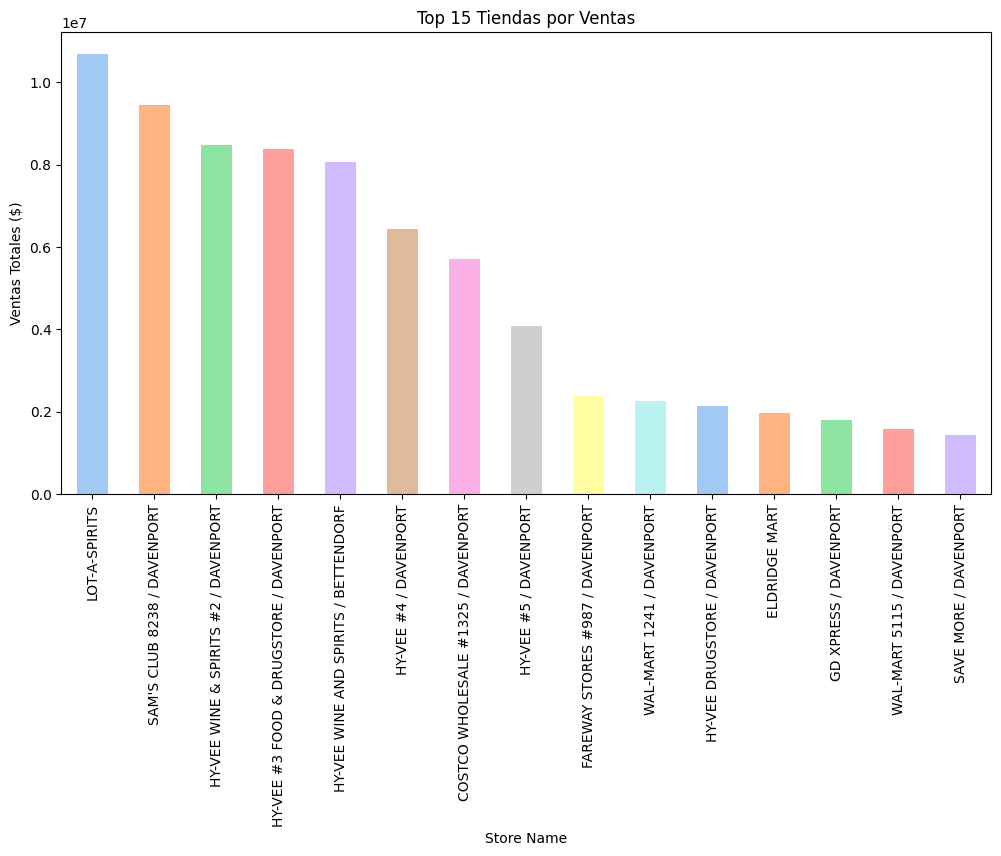

In [ ]:
# Análisis de ventas
print("\n--- Análisis de ventas ---")
plt.figure(figsize=(12, 6))
df_js.groupby('Store Name')['Sale (Dollars)'].sum().sort_values(ascending=False).head(15).plot(kind='bar',color=colors)
plt.title('Top 15 Tiendas por Ventas')
plt.ylabel('Ventas Totales ($)')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Análisis temporal
print("\n--- Análisis temporal ---")
# df_js.set_index('Date', inplace=True)
monthly_sales = df_js.resample('M')['Sale (Dollars)'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Ventas Mensuales del Condado js')
plt.ylabel('Ventas ($)')
plt.show()


--- Análisis temporal ---


In [ ]:
# Relación entre variables Volumen de Botella y Ventas
print("\n--- Relación entre variables ---")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Bottle Volume (ml)', y='Sale (Dollars)', data=df_js)
plt.title('Relación entre Volumen de Botella y Ventas')
plt.show()


--- Relación entre variables ---



--- Análisis por categoría ---


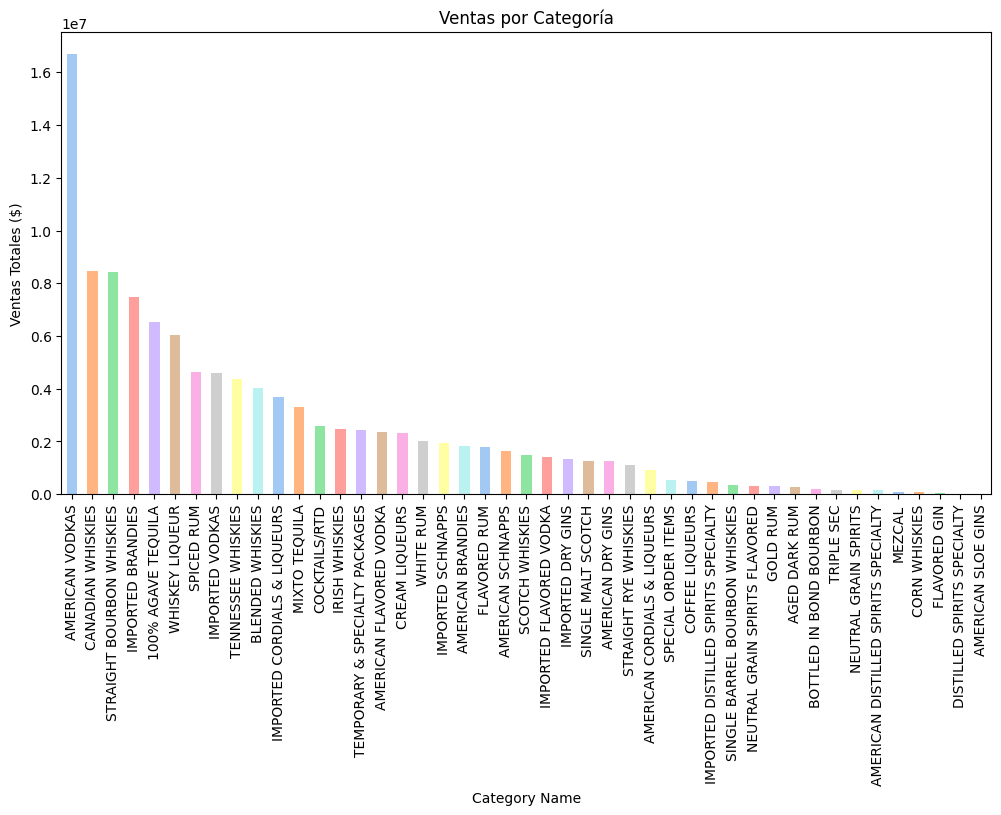

In [ ]:
# Análisis por categoría
print("\n--- Análisis por categoría ---")
plt.figure(figsize=(12, 6))
df_js.groupby('Category Name')['Sale (Dollars)'].sum().sort_values(ascending=False).plot(kind='bar',color=colors)
plt.title('Ventas por Categoría')
plt.ylabel('Ventas Totales ($)')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Análisis de margen
print("\n--- Análisis de margen ---")
df_js['Margen'] = (df_js['State Bottle Retail'] - df_js['State Bottle Cost']) / df_js['State Bottle Cost']

print("\nEstadísticas de Margen:")
print(df_js['Margen'].describe())


--- Análisis de margen ---

Estadísticas de Margen:
count   595691.00
mean         0.50
std          0.01
min          0.02
25%          0.50
50%          0.50
75%          0.50
max          1.85
Name: Margen, dtype: float64



--- Eficiencia de ventas ---


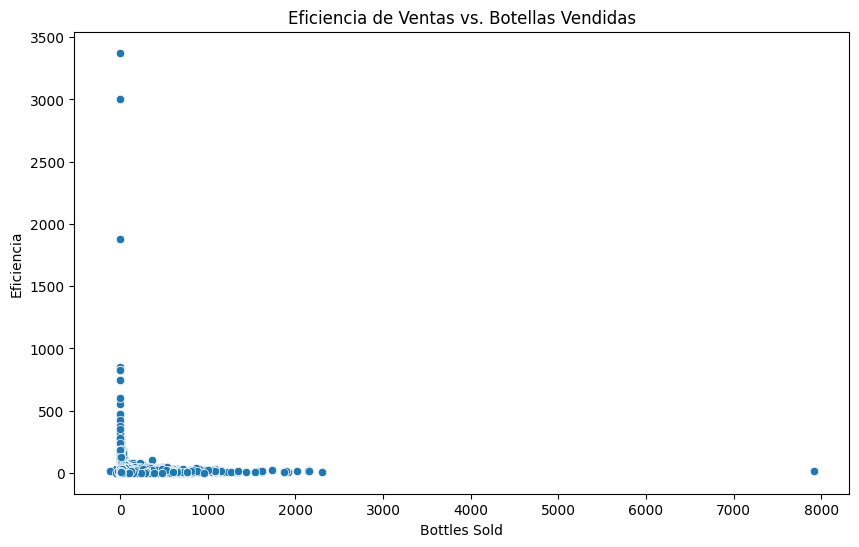

In [ ]:
# Eficiencia de ventas
print("\n--- Eficiencia de ventas ---")
df_js['Eficiencia'] = df_js['Sale (Dollars)'] / df_js['Bottles Sold']
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Bottles Sold', y='Eficiencia', data=df_js)
plt.title('Eficiencia de Ventas vs. Botellas Vendidas')
plt.show()

In [ ]:
# Análisis de outliers
print("\n--- Análisis detallado de Outliers ---")

def analyze_outliers(df, column):
    # Calculamos los límites para los outliers usando el método IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificamos los outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Imprimimos estadísticas sobre los outliers
    print(f"\nAnálisis de outliers para {column}:")
    print(f"Número de outliers: {len(outliers)}")
    print(f"Porcentaje de outliers: {len(outliers) / len(df) * 100:.2f}%")
    print(f"Rango de valores normales: {lower_bound:.2f} - {upper_bound:.2f}")

    if len(outliers) > 0:
        print("\nEstadísticas de los outliers:")
        print(outliers[column].describe())


# Analizamos outliers para columnas numéricas relevantes
numeric_columns = ['Sale (Dollars)', 'Bottles Sold', 'Volume Sold (Liters)',
                   'State Bottle Cost', 'State Bottle Retail']

for col in numeric_columns:
    analyze_outliers(df_js, col)


--- Análisis detallado de Outliers ---

Análisis de outliers para Sale (Dollars):
Número de outliers: 45438
Porcentaje de outliers: 7.63%
Rango de valores normales: -146.33 - 375.80

Estadísticas de los outliers:
count    45438.00
mean      1134.50
std       1756.53
min      -1656.00
25%        459.96
50%        620.64
75%       1102.50
max     150559.20
Name: Sale (Dollars), dtype: float64

Análisis de outliers para Bottles Sold:
Número de outliers: 53705
Porcentaje de outliers: 9.02%
Rango de valores normales: -10.50 - 25.50

Estadísticas de los outliers:
count   53705.00
mean       79.46
std        96.84
min      -120.00
25%        48.00
50%        48.00
75%        84.00
max      7920.00
Name: Bottles Sold, dtype: float64

Análisis de outliers para Volume Sold (Liters):
Número de outliers: 38339
Porcentaje de outliers: 6.44%
Rango de valores normales: -10.75 - 23.25

Estadísticas de los outliers:
count   38339.00
mean       77.32
std       156.50
min       -52.50
25%        27.00
5

In [ ]:
# Impacto de los outliers en las estadísticas
print("\n--- Impacto de los outliers en las estadísticas ---")

def stats_with_without_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_without_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    print(f"\nEstadísticas para {column}:")
    print("Con outliers:")
    print(df[column].describe())
    print("\nSin outliers:")
    print(df_without_outliers[column].describe())

for col in numeric_columns:
    stats_with_without_outliers(df_js, col)


--- Impacto de los outliers en las estadísticas ---

Estadísticas para Sale (Dollars):
Con outliers:
count   595691.00
mean       188.08
std        561.92
min      -1656.00
25%         49.47
50%         94.47
75%        180.00
max     150559.20
Name: Sale (Dollars), dtype: float64

Sin outliers:
count   550253.00
mean       109.93
std         83.56
min       -141.12
25%         45.00
50%         87.12
75%        156.60
max        375.60
Name: Sale (Dollars), dtype: float64

Estadísticas para Bottles Sold:
Con outliers:
count   595691.00
mean        14.98
std         36.03
min       -120.00
25%          3.00
50%          6.00
75%         12.00
max       7920.00
Name: Bottles Sold, dtype: float64

Sin outliers:
count   541986.00
mean         8.59
std          6.70
min         -8.00
25%          3.00
50%          6.00
75%         12.00
max         25.00
Name: Bottles Sold, dtype: float64

Estadísticas para Volume Sold (Liters):
Con outliers:
count   595691.00
mean        10.78
std       

In [ ]:
# Patrones de venta por día de la semana
print("\n--- Patrones de venta por día de la semana ---")
df_js['Dia_Semana'] = df_js.index.dayofweek
ventas_por_dia = df_js.groupby('Dia_Semana')['Sale (Dollars)'].mean()
plt.figure(figsize=(10, 6))
ventas_por_dia.plot(kind='bar', color=colors)
plt.title('Ventas Promedio por Día de la Semana')
plt.xlabel('Día de la Semana (0 = Lunes, 6 = Domingo)')
plt.ylabel('Ventas Promedio ($)')
plt.xticks(rotation=0)
plt.show()


--- Patrones de venta por día de la semana ---



--- Análisis de la relación precio-volumen ---


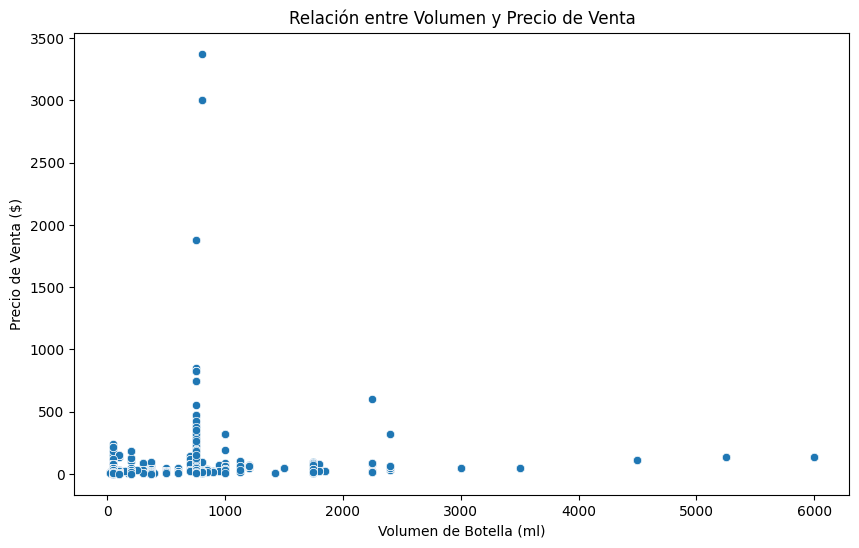

In [ ]:
# Análisis de la relación precio-volumen
print("\n--- Análisis de la relación precio-volumen ---")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Bottle Volume (ml)', y='State Bottle Retail', data=df_js)
plt.title('Relación entre Volumen y Precio de Venta')
plt.xlabel('Volumen de Botella (ml)')
plt.ylabel('Precio de Venta ($)')
plt.show()